# Predicting House Prices
Using the __ and __ dataset, we will be using Random Forest Method to predict the future house prices

First load the datasets within this file using a list comprehension

In [1]:
import pandas as pd

In [2]:
# Create a list of all FED file titles
fed_filenames = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]

# read each csv and recognise their dates using the csv titles labelled in the fed_filenames list
df_list = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_filenames]

In [3]:
# Inspect the dataframe
df_list[0].head()

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29


In [4]:
# Combine the dataframes
fed_data = pd.concat(df_list, axis = 1)
fed_data.head()

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95


In [5]:
# There are a lot of NaN values that need further inspecting...
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,NaN,NaN,278.524
2021-11-04,3.09,NaN,NaN
2021-11-10,2.98,NaN,NaN
2021-11-18,3.10,NaN,NaN
2021-11-24,3.10,NaN,NaN
2021-12-01,NaN,NaN,280.126
2021-12-02,3.11,NaN,NaN
2021-12-09,3.10,NaN,NaN
2021-12-16,3.12,NaN,NaN


Based on our observations of the data, we can see that the CPIAUCSL is calculated monthly, whereas the MORTGAGE30US and RRVRUSQ156N is calculated weekly. Therefore, there is a lot of missing values for different dates. We can fix this with a forward fill...

In [6]:
# Complete a forward fill and drop any remaining NA values
fed_data = fed_data.ffill().dropna()

# Rename columns for clarity
fed_data.columns = ['interest', 'vacancy', 'cpi']

# Inspect the new dataset
fed_data.tail(50)

,interest,vacancy,cpi
DATE,,,
2021-11-01,3.14,5.6,278.524
2021-11-04,3.09,5.6,278.524
2021-11-10,2.98,5.6,278.524
2021-11-18,3.10,5.6,278.524
2021-11-24,3.10,5.6,278.524
2021-12-01,3.10,5.6,280.126
2021-12-02,3.11,5.6,280.126
2021-12-09,3.10,5.6,280.126
2021-12-16,3.12,5.6,280.126


We will now load the Zillow data

In [7]:
# Create a list of the file titles you want to load
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

# Use a list comprehension to read each csv
dfs = [pd.read_csv(f) for f in zillow_files]

# Inspect the first data frame: Metro_median_sale_price_uc_sfrcondo_week.csv
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


Each row is a different region in the US, with the columns showing average house prices for that region per week. We want to keep only one row, which gives information for house prices in the US as a whole. This is the first row. We also do not need the first 5 columns, as we will only be working from the dated columns.

In [8]:
# Inspect the second dataset: Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month
dfs[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,108641.264685,108472.728880,108532.280074,108739.077466,108986.621607,...,318648.557319,322227.276010,327377.250887,332206.790140,338002.747686,344042.433111,350515.841789,354717.722904,357473.327397,357107.271636
1,394913,1,"New York, NY",Msa,NY,188550.306900,186833.460516,186448.089063,186132.003064,186023.979536,...,573099.183713,575351.020713,577891.698212,582902.117225,588521.056859,598696.268370,607668.479848,615457.379763,619722.310507,621307.894902
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186683.041088,186015.165187,185723.797105,185700.155256,185569.298179,...,854076.999683,862487.347366,874894.413168,888106.123973,902359.871460,931407.638755,950811.533011,955845.190020,933648.296046,929753.425908
3,394463,3,"Chicago, IL",Msa,IL,147341.931571,147341.152880,146420.379418,147841.918776,148371.389735,...,288899.103704,290304.887853,291998.702189,294814.368208,298667.824107,304076.779527,308802.105551,314032.378286,315084.424557,314178.550606
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,113283.512989,113199.113561,113519.423633,114048.064719,114287.444295,...,338187.525418,344409.906452,351186.037787,359878.893639,370452.369604,376522.090399,391696.585402,399613.324087,401254.775442,396903.773679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92899.038250,92999.754549,97296.415265,98217.639150,100010.331287,101084.700150,101376.966610,103321.694906,105794.451088,106244.149398
909,753874,930,"Craig, CO",Msa,CO,66532.401041,66795.083062,67178.691523,67680.532389,67149.040671,...,244845.354879,245187.643589,253767.119261,254926.311559,253700.139970,255387.314731,254937.506748,256166.409003,266655.039121,268370.634013
910,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,169404.973627,171295.739580,178176.871040,178929.217811,179113.938659,181811.015503,184752.025925,187573.847282,192967.342193,193366.794326
911,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80043.974772,80196.507293,NaN,86966.994296,88535.643138,88556.495891,88921.719463,89261.931509,92129.408692,93197.602418


This second dataset format is very similar to the first dataset, however, the average monthly house prices are given instead of weekly

In [9]:
# Slice the data farmes to only get the first row and cut out the first 5 columns. Then make these columns rows instead
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]

# Combine the datasets by adding a common column between both to merge on
for df in dfs:
    df.index = pd.to_datetime(df.index) # Convert the indexes from strings to dates
    df["month"] = df.index.to_period("M") # Convert date "YYYY-MM-DD" to "YYYY-MM", stored in the column "month"

# Check if code worked accordingly
dfs[0]

,0,month
2008-02-02,190000.0,2008-02
2008-02-09,190000.0,2008-02
2008-02-16,193000.0,2008-02
2008-02-23,189900.0,2008-02
2008-03-01,194900.0,2008-03
...,...,...
2022-06-11,370000.0,2022-06
2022-06-18,375000.0,2022-06
2022-06-25,370000.0,2022-06
2022-07-02,370000.0,2022-07


In [10]:
# Merge the datasets on 'month' column (left join)
price_data = dfs[0].merge(dfs[1], on="month")

# Make sure the index of the new df matches up with the left original df
price_data.index = dfs[0].index

# Inspect
price_data.head(5) # 0_x is the price, 0_y is the value

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952


In [11]:
# We no longer need the month column, so delete it
del price_data['month']

# Rename the columns for clarity
price_data.columns = ['price', 'value']

# Inspect
price_data.head(5)

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952


The fed data is usually released 2 days after the zillow data is released. Therefore, we need to align the dates for merging and further analysis

In [12]:
# Import the timedelta package to use for the index
from datetime import timedelta

# Add two days to the fed data dates index to align with the dates from the zillow data
fed_data.index = fed_data.index + timedelta(days=2)

# Inspect to confirm
fed_data

,interest,vacancy,cpi
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2022-07-16,5.51,5.6,295.271
2022-07-23,5.54,5.6,295.271
2022-07-30,5.30,5.6,295.271


In [13]:
# We can now merge our data as the indexes line up (left merge on index)
price_data = fed_data.merge(price_data, left_index=True, right_index=True)

# Inspect
price_data

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


We will now add new columns for the adjusted price values according to the inflation rates at the time (CPI)

In [15]:
price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100

Plot the data to further investigate the current data.

1. Plot the price and the adjusted price value over time.

<AxesSubplot: >

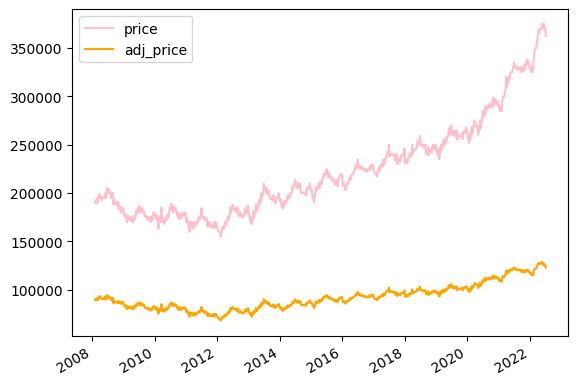

In [24]:
# Plot the house prices over time
price_data.plot.line(y=["price", "adj_price"], use_index=True, color = ['pink', 'orange'])

<AxesSubplot: >

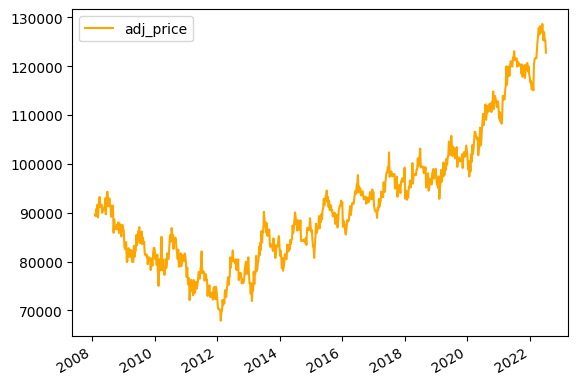

In [21]:
# Plot the adjusted house prices over time (To view the plot more zoomed in)
price_data.plot.line(y="adj_price", use_index=True, color = 'orange')

Create a new column that predicts the next quarter using shift in the numpy package

In [25]:
# Grab the price from the future rows and put in the current row, under a new column
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

# There will be missing values for the last few rows as there are no dates available after this to pull data from. 
# Drop these rows as we cannot use them to train the algorithm to make predictions
price_data.dropna(inplace=True)

# Inspect the new data
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516


Create a target column to investigate whether adjusted prices went up or down 3 months from the current date.

In [26]:
# Positive change = 1, negative change = 0
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

# Inspect new column
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1


Before applying ML model, we need to investigate how many positive and negative changes there were in the data. We need to account for it if the counts are not balanced in our model.

In [28]:
price_data["change"].value_counts()

1    379
0    343
Name: change, dtype: int64

We can see that the value counts are very similar and generally balanced. Now start the ML model, we need to define the predictors that we will use to predict the target. Choosing to use random forest method as it is robust (preventing overfitting) and works well with non-linear patterns.

We will then test the model using backtesting, which respects the order of the dates in the dataset 

In [1]:
# Create a list of predictors
predictors = ["interest", "vacancy", "adj_price", "adj_value"]

# Define the target for the algorithm
target = "change"

In [4]:
# Import functions from Scikit learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Gives what % of the time our model is correct
import numpy as np

START = 260
STEP = 52

# Create a function that trains the randomforest model and generates predictions

def predict(train, test, predictors, target):
    # This takes a training set, a test set, set of predictors and the target
    
    # Initialise random forest
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    # 'split' parameter prevents overfitting, random_state sets a seed, so generates the same sequence of random numbers
    
    # fit the model using the training data (Training the model)
    rf.fit(train[predictors], train[target])
    
    # Generate the predictions and return them
    preds = rf.predict(test[predictors])
    return preds


# Create a function that backtests using the predict function
def backtest(data, predictors, target):
    
    # Initialise empty predictions list that will be appended to
    all_preds = []
    
    # For loop that makes predictions for the next year based on the past 5 years
    for i in range(START, data.shape[0], STEP):
        
        # training data is everything up till i in dataset
        train = price_data.iloc[:i]
        
        # Test data is everything between i and one year from i
        test = price_data.iloc[i:(i+STEP)]
        
        # Add to the list the predictions made from the backtest
        all_preds.append(predict(train, test, predictors, target))
    
    # Combine all the predictions into a single list
    preds = np.concatenate(all_preds)
    
    # Give the predictions and how accurate these predictions are
    return preds, accuracy_score(data.iloc[START:][target], preds)

ModuleNotFoundError: No module named 'scikitlearn'

In [ ]:
preds, accuracy = backtest(price_data, predictors, target)
print('predictions: ', preds[:10], 
      '\naccuracy: ', accuracy)

In [ ]:
yearly = price_data.rolling(52, min_periods=1).mean()
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]
price_data

In [ ]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)
accuracy

In [ ]:
pred_match = (preds == price_data[target].iloc[START:])
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

In [ ]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)


In [ ]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)
result["importances_mean"] # Print this

print(predictors)